In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.integrate import ode

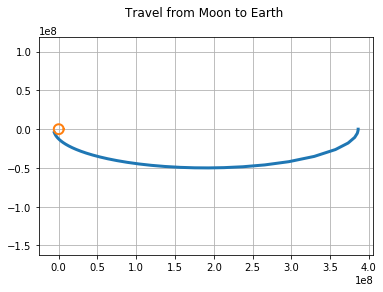

[-5711358.77986204] [-4324215.01863541]
430000.0


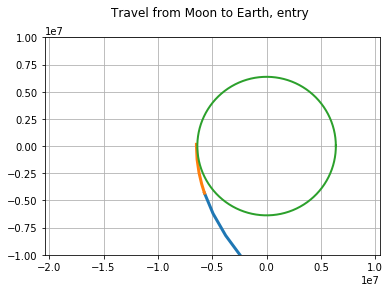

[-6451803.07768287] [128.85451058] [160653.12322822] [11068.56690075]
82802.9392909985 420.0


In [5]:
h=50000
Re=6371000
Rm=1738000
Rem=3844e5
G=6.67e-11
Me=5.97e24
Mm=7.36e22
T=428450#Flight time
Vm=m.sqrt(G*Me/(Rem))

V0=m.sqrt(G*Mm/(Re+h))*1.376

def fout(t, y): 
    ''' Обработчик шага '''
    ts.append(t)
    ys.append(list(y.copy()))
    y1, y2, y3, y4 = y
    
    if (m.sqrt(y1**2 + y3**2)<(Re+70000)):
        return -1
    
def distToMoon(x,y,tm):
    xm, ym=Moonpos(tm)
    return m.sqrt((y-ym)**2+(x-xm)**2)
 
def Moonpos(tm):
    omega= Vm / Rem
    xm= Rm * m.cos(omega * tm)
    ym= Rm * m.sin(omega * tm)
    
    return xm,ym
    
        

def f(t, y):
    ''' Функция правых частей системы ОДУ '''
    
    y1, y2, y3, y4 = y
    xm, ym=Moonpos(t)
    
    ax = -y1 * G*Me / ((y1*y1+y3*y3)**1.5) \
        + (xm-y1) * G*Mm / (distToMoon(y1,y3,t)**3)
    ay=-y3*G*Me/((y1*y1+y3*y3)**1.5) \
        - (y3-ym) * G*Mm / (distToMoon(y1,y3,t)**3)
    
    return [y2,ax, y4, ay] 
     
if __name__== "__main__":
    tmax=430000  
    x_start=Rem+Rm+h
    Vx_start=0
    y_start=0
    Vy_start=-V0+Vm

    y0,t0=[x_start,  Vx_start, y_start, Vy_start], 0 # начальные условия 
    ODE=ode(f)
    ODE.set_integrator('dopri5')#, max_step=0.01)
    ODE.set_solout(fout)
   
    ts, ys = [ ],[ ]
    ODE.set_initial_value(y0, t0) # задание начальных значений
    ODE.integrate(tmax)      # решение ОДУ
    Y=np.array(ys)

    xc,yc=[],[]
    for i in range(0, 630):
        xc.append(Re * m.cos(i / 100))
        yc.append(Re * m.sin(i / 100))



    plt.plot(Y[:,0], Y[:,2], linewidth=3)
    plt.axis('equal')
    plt.plot(xc,yc,linewidth=2)
    plt.title("Travel from Moon to Earth \n ")

    plt.grid(True)
    #plt.xlim(0,8)
    #plt.ylim(-0.1,2)

    plt.show()
    print(Y[-1:,0],Y[-1:,2])
    print(ts[-1]);

    #for t in range 0,

    y0, t0=[Y[-1:,0], Y[-1:,1],  Y[-1:,2], Y[-1:,3]], 0 # начальные условия 
    #ODE.set_integrator('dopri5', max_step=10)
    ts, ys = [ ], [ ]
    ODE.set_initial_value(y0, t0) # задание начальных значений
    ODE.integrate(420)    

    # решение ОДУ
    Y1=np.array(ys)
    plt.plot(Y[-5:,0],Y[-5:,2],linewidth=3)
    plt.plot(Y1[:,0],Y1[:,2],linewidth=3)
    plt.plot(xc,yc,linewidth=2)


    plt.title("Travel from Moon to Earth, entry \n ")
    plt.axis('equal')
    plt.grid(True)
    plt.xlim(-1e7, 0)
    plt.ylim(-1e7, 1e7)
    plt.show()

    print(Y1[-1:,0],Y1[-1:,1],Y1[-1:,2],Y1[-1:,3])
    print(m.sqrt((Y1[-1:,0])**2+(Y1[-1:,2])**2)-Re,ts[-1]);
